# Comparative analysis

Comparative analysis are often carried out in the statistical survey, for example, different variables are observed on the same group of individuals. A typical problem is to ask if there is a **correlation** between the observed variables. In this case we will consider two different datasets: the climbing statistic of the mount Rainier and the weather conditions on the same days.

In [1]:
pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 8.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

base_dir = '/gdrive/My Drive/Colab_Notebooks/Statistica/lezione_1/notebook/data/'

Mounted at /gdrive
/gdrive


#Load excel file:


In [5]:
import pandas as pd
import numpy as np
import os  
 

# Load climbing statistics 
dfc = pd.read_excel(os.path.join(base_dir, 'climbing_statistics.xls'), sheet_name = 'data')
print(dfc.columns.tolist())

# Load weather conditions
dfw = pd.read_csv(os.path.join(base_dir, 'Rainier_Weather.csv'))
print(dfw.columns.tolist())

['Date', 'Route', 'Attempted', 'Succeeded', 'Success Percentage']
['Date', 'Battery Voltage AVG', 'Temperature AVG', 'Relative Humidity AVG', 'Wind Speed Daily AVG', 'Wind Direction AVG', 'Solare Radiation AVG']


#Merge dataFrames:

In [9]:
 
# Merge the two datasets based on Date
df = pd.merge(dfc, dfw, on='Date')
print(df.columns.tolist())
df.head()

['Date', 'Route', 'Attempted', 'Succeeded', 'Success Percentage', 'Battery Voltage AVG', 'Temperature AVG', 'Relative Humidity AVG', 'Wind Speed Daily AVG', 'Wind Direction AVG', 'Solare Radiation AVG']


,Date,Route,Attempted,Succeeded,Success Percentage,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,11/27/2015,Disappointment Cleaver,2,0,0.0,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250
1,11/21/2015,Disappointment Cleaver,3,0,0.0,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417
2,10/15/2015,Disappointment Cleaver,2,0,0.0,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000
3,10/13/2015,Little Tahoma,8,0,0.0,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667
4,9/30/2015,Disappointment Cleaver,2,0,0.0,13.483333,38.729583,57.369583,11.300750,216.934167,202.812750


# Add a new column:

In [10]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month


df.head()

,Date,Route,Attempted,Succeeded,Success Percentage,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Month
0,2015-11-27,Disappointment Cleaver,2,0,0.0,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250,11
1,2015-11-21,Disappointment Cleaver,3,0,0.0,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417,11
2,2015-10-15,Disappointment Cleaver,2,0,0.0,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000,10
3,2015-10-13,Little Tahoma,8,0,0.0,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667,10
4,2015-09-30,Disappointment Cleaver,2,0,0.0,13.483333,38.729583,57.369583,11.300750,216.934167,202.812750,9


# Scatterplot:

the first useful step to qualitatively investigate the **possible dependence between two variables $x$ and $y$** consists in drawing a plot, called dispersion diagram or **scatterplot**.

In [12]:
import matplotlib.pyplot as plt

# Group all data by month and aggregate columns by considering the mean value
dfbymonth = df.groupby('Month', as_index=False).agg('mean')

dfbymonth

,Month,Attempted,Succeeded,Success Percentage,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,1,3.230769,0.769231,0.230769,13.593590,28.421410,52.284029,12.383295,251.147160,0.475962
1,2,2.800000,0.150000,0.050000,13.616229,21.917225,30.697975,15.057663,173.939012,0.278742
2,3,5.200000,0.000000,0.000000,13.674583,21.531042,80.852792,35.639817,249.898200,0.000000
3,4,3.407407,0.703704,0.135802,13.611451,27.295017,49.286404,16.590267,221.725839,23.785903
4,5,5.345912,2.471698,0.392538,13.571043,34.969958,64.600388,9.465680,179.928793,154.466692
5,6,5.292621,3.162850,0.569488,13.512796,41.208179,51.555637,9.965713,172.293516,315.434089
6,7,5.452055,2.869863,0.491330,13.495547,40.415721,49.825930,9.639810,185.854520,306.695809
7,8,6.019481,2.500000,0.452542,13.452702,43.607281,36.697212,14.305369,129.104284,258.475937
8,9,7.753846,2.153846,0.276259,13.471904,33.052017,61.083420,14.851729,141.123614,170.928846
9,10,5.000000,0.000000,0.000000,13.496667,43.713750,27.773479,18.377396,269.450271,157.384833


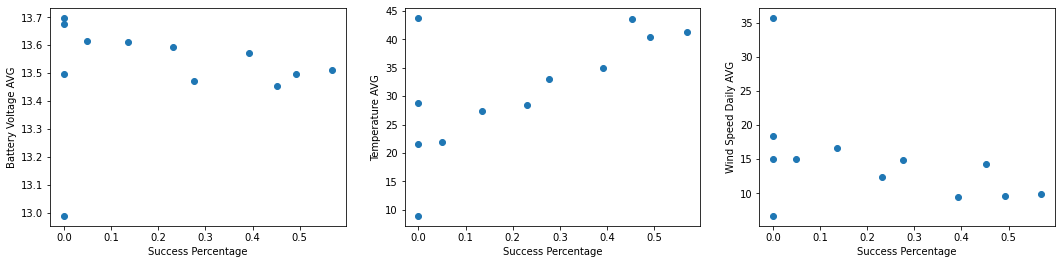

In [13]:
f, ax = plt.subplots(1, 3, sharex=True, figsize=(18,4))

#Success Percentage vs Battery Voltage AVG
ax[0].scatter(dfbymonth['Success Percentage'], dfbymonth['Battery Voltage AVG'])
ax[0].set_ylabel('Battery Voltage AVG')
ax[0].set_xlabel('Success Percentage')

#Success Percentage vs Temperature AVG
ax[1].scatter(dfbymonth['Success Percentage'], dfbymonth['Temperature AVG'])
ax[1].set_ylabel('Temperature AVG')
ax[1].set_xlabel('Success Percentage')

#Success Percentage vs Wind Speed Daily AVG
ax[2].scatter(dfbymonth['Success Percentage'], dfbymonth['Wind Speed Daily AVG'])
ax[2].set_ylabel('Wind Speed Daily AVG')
ax[2].set_xlabel('Success Percentage')


plt.show()

The first plot does not suggest that there is a correlation between the two variables: the points are scattered without apparent regularity. The second plot instead shows a certain regularity: points with small $x$ value have small $y$ value and points with large $x$ have large $y$; in this case it is said that there is a **direct correlation** between the two variables. Analogously we speak of **inverse correlation** between the two variables if the growth of one corresponds to the decrease of the other.

## Compute the Covariance
Given $n$ observations of $x$ and $y$ variables, their covariance is given by: $$S_{xy}=\frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})$$

In [15]:
# Warning!! numpy library function returns covariance matrix
# |Sxx Sxy|
# |Syx Syy|
#
x = dfbymonth['Success Percentage']
y = dfbymonth['Temperature AVG']
covMatrix = np.cov(x,y)
print(' Covariance matrix: ')
print(covMatrix)
covXY= covMatrix[0, 1]

print ('\n Covariance of Success Percentage and Temperature:  %.2f' % covXY)

 Covariance matrix: 
[[4.65759082e-02 1.48331837e+00]
 [1.48331837e+00 1.10761919e+02]]

 Covariance of Success Percentage and Temperature:  1.48


## Correlation
Is said correlation of two variables $x$ and $y$ the value

$$r = \frac{S_{xy}}{\sqrt{s_x^2 \cdot s_y^2}} = \frac{S_{xy}}{s_x \cdot s_y}$$

In [16]:
# Warning!! also numpy library function returns correlation matrix
# |rxx rxy|
# |ryx ryy|
#

x = dfbymonth['Success Percentage']
y = dfbymonth['Temperature AVG']
corrMatrix = np.corrcoef(x, y)

print(' Correlation matrix: ')
print(corrMatrix)
covXY= corrMatrix[0, 1]

print ('\n Correlation of Success Percentage and Temperature:  %.2f' % covXY)

 Correlation matrix: 
[[1.         0.65306811]
 [0.65306811 1.        ]]

 Correlation of Success Percentage and Temperature:  0.65


### Make an exhaustive correlation analysis.

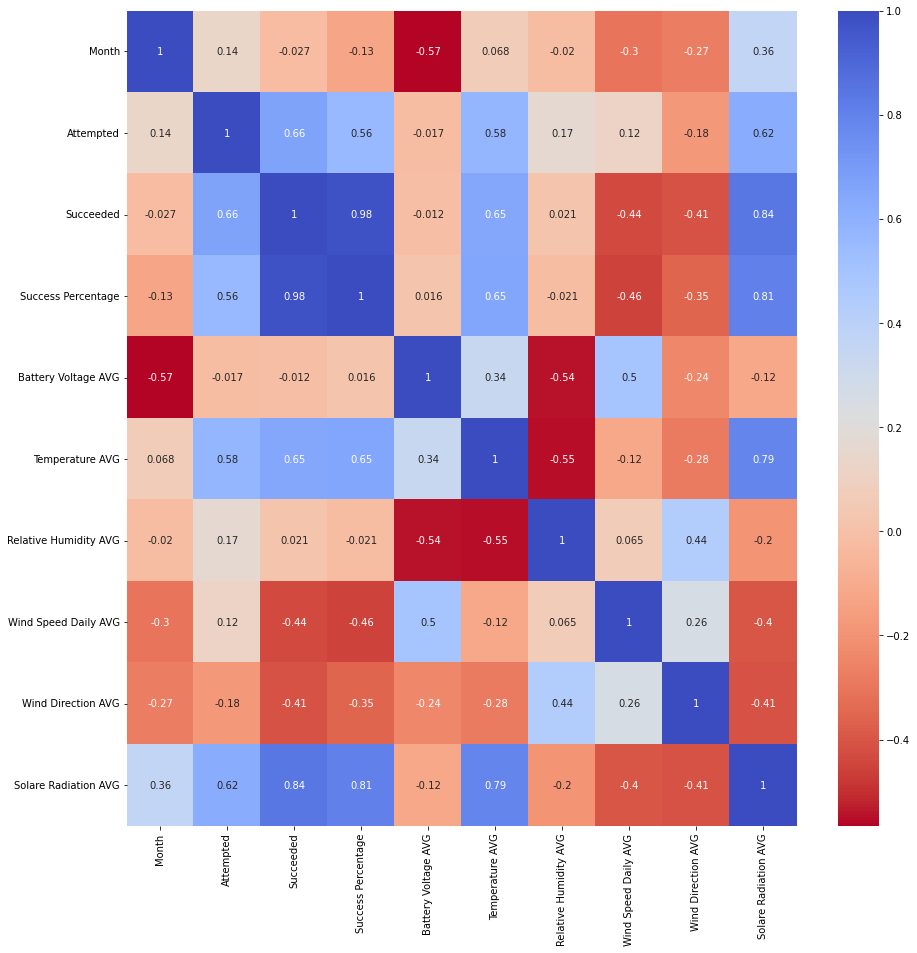

In [17]:
import seaborn as sns

f, ax = plt.subplots(1, 1, figsize=(15, 15))

corr_succ = dfbymonth.corr()
sns.heatmap(corr_succ, cmap="coolwarm_r", annot=True, ax=ax)

ax.set_ylim(len(df.columns)-2, 0)
plt.show()

## Linear Regression
#### Least Squares
When $r$ is next to $-1$ or $+1$ and the scatter plot suggests a linear relationship, it makes sense to determine the equation of a line that approximates the assigned data "in the best way".

Given $x$ and $y$, and being

$$\hat{y}=b_0+b_1x$$

the equation of the line to determine, we need to minimise the quantity

$$E=\sum_{i=1}^{n}(y_i - \hat{y_i})^2 = \sum_{i=1}^{n}(y_i - b_0 - b_1 x_i)^2$$

where $b_0$ (intercept) and $b_1$ (slope) are given by

$$\begin{cases} \left(\sum_{i=1}^{n} x_i^2\right) b_1 + \left(\sum_{i=1}^{n} x_i\right) b_0 = \sum_{i=1}^{n} x_i y_i \\ \left(\sum_{i=1}^{n} x_i\right) b_1 + n b_0 = \sum_{i=1}^{n}y_i \end{cases}$$

In [ ]:
from scipy import stats

b1, b0,_,_,_ = stats.linregress(x,y)

print("The line equation is y = %.2f + %.2f x" % (b0,b1))

The line equation is y = 24.26 + 31.85 x


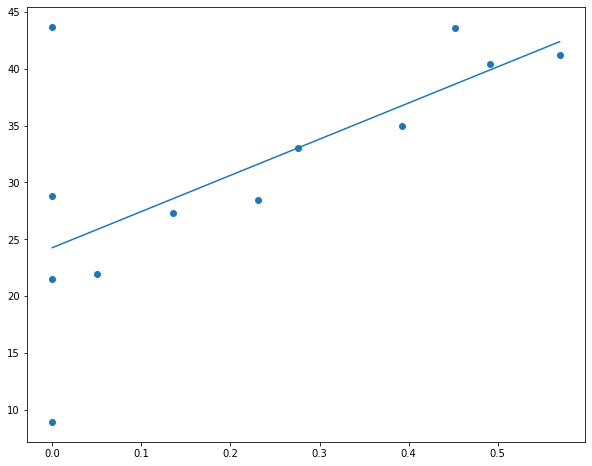

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(dfbymonth['Success Percentage'], dfbymonth['Temperature AVG'])

xx = np.linspace(dfbymonth['Success Percentage'].min(), dfbymonth['Success Percentage'].max())
yy = b0 + b1 * xx
plt.plot(xx, yy)
plt.show()